In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pylab
import scipy

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')



In [2]:
df = pd.read_csv('D:/Python/Insight/csv_data/all_data/final/out_with_TOT.csv')

codes = ['ovechal01','crosbsi01','malkiev01','zettehe01','richabr01','kanepa01','datsypa01','toewsjo01','backsni02','giroucl01','jagrja01','callary01','nashri01','hossama01','nealja01','pariseza01','thornjo01','bergepa01','mcdonry01','mcdavco01','matthau01','tarasvl01'] 
values = [0.9,1,0.33,0.11,0.29,1,0.57,0.9,0.11,0.56,0.125,0.33,0.11,0.14,0.11,0.22,0.22,0.22,0.33,1,1,0.33]

df.head()  

,Ind,Code,First_name,Last_name,Position,Shoots,Draft_year,Draft_round,Height,Weight,...,P,P1,GS,C+/-,G+/-,GF%,xG+/-,iP+/-,iCF,iCF/60
0,0,abdelju01,Justin,Abdelkader,LW,L,2005,2.042,188,214,...,NaN,NaN,0.38,1.0,NaN,50.00,0.49,-1.0,8.0,20.85
1,1,abdelju01,Justin,Abdelkader,LW,L,2005,2.042,188,214,...,NaN,NaN,0.81,13.0,NaN,NaN,0.62,NaN,7.0,22.60
2,2,abdelju01,Justin,Abdelkader,LW,L,2005,2.042,188,214,...,6.0,6.0,11.00,29.0,-12.0,NaN,1.85,3.0,132.0,16.55
3,3,abdelju01,Justin,Abdelkader,LW,L,2005,2.042,188,214,...,18.0,14.0,31.52,132.0,13.0,62.26,8.17,NaN,212.0,16.57
4,4,abdelju01,Justin,Abdelkader,LW,L,2005,2.042,188,214,...,22.0,20.0,33.72,102.0,5.0,54.24,2.34,11.0,189.0,13.04


In [3]:
df2=df.copy()
df2=df2.rename(columns = {'CF% QoC':'CFQoC'})
df2=df2.rename(columns = {'CF% QoT':'CFQoT'})
df2=df2.rename(columns = {'TOI% QoT':'TOIQoT'})

tmplst = list(df2['TOI% QoC'])
del df2['TOI% QoC']
df2['TOIQoC'] = tmplst

df2['Age_dot'] = df2['Age']
del df2['Age']
age = []
nsalary = []
maxvalue=[]
tps = [] 
dp=[]

for i in range(0,len(df2)):
    
    age.append((df2['Year'][i] -df2['Draft_year'][i]) + 18)
     
    temp = df2[df2['Year'] == df2['Year'][i]]
    maxvalue = temp['Salary'].max()
    nsalary.append(df2['Salary'][i]/maxvalue)
    tps.append(df2['OPS'][i] + df2['DPS'][i])
    
    #dp.append(df2['Draft_round'][i][0])
   
df2['Age'] = age  
df2['Salary_norm'] = nsalary
df2['TPS'] = tps

df2['CodeL'] = (np.nan)*len(df2)

codesu = df2['Code'].unique()
values=[]
for i in range(0,len(codesu)):
    info= df2[df2['Code'] == codesu[i]]
    idi = info.index.values.tolist()
    df2['CodeL'][idi]     = int(i+1)  
    
     
df2.info() 
df3 = df2.copy()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11208 entries, 0 to 11207
Data columns (total 87 columns):
Ind            11208 non-null int64
Code           11208 non-null object
First_name     11208 non-null object
Last_name      11208 non-null object
Position       11208 non-null object
Shoots         11208 non-null object
Draft_year     11208 non-null int64
Draft_round    11208 non-null float64
Height         11208 non-null int64
Weight         11208 non-null int64
DOB            11208 non-null object
Country        11208 non-null object
Place          11208 non-null object
Year           11208 non-null int64
Team           11208 non-null object
Games          11208 non-null int64
Goals          11208 non-null int64
Assists        11208 non-null int64
Points         11208 non-null int64
PM             11208 non-null int64
Pen            11208 non-null int64
G_ev           11208 non-null int64
G_pp           11208 non-null int64
G_sh           11208 non-null int64
Gwg            1

In [4]:
df4=df3[(df3['Year']>=2016) & (df3['Year']<=2018)]
df4 = df4.fillna(df4.mean())
df4.loc[df4['PDO']<1, 'PDO']=100
df4.loc[df.Country == 'SU', 'Country'] = "RU"

In [5]:
#df4=df4.drop_duplicates(['Code'],keep='last')
df4=df4.drop(['Ind'], axis=1).reset_index(drop=True)
names = df4['Code'].unique()


In [6]:
df4.describe()

,Draft_year,Draft_round,Height,Weight,Year,Games,Goals,Assists,Points,PM,...,xG+/-,iP+/-,iCF,iCF/60,TOIQoC,Age_dot,Age,Salary_norm,TPS,CodeL
count,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,...,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000
mean,2007.974434,2.899105,185.410356,201.047573,2016.997735,47.013592,7.143366,11.967961,19.111327,-0.578641,...,-0.197507,-1.182711,128.134412,10.789237,28.600968,28.519134,27.023301,0.211262,2.332880,1350.270227
std,4.674064,2.143488,5.375859,15.206638,0.819988,29.151292,8.498119,12.748937,20.026833,9.304938,...,4.881162,5.316285,92.172597,3.301236,0.697108,4.452767,4.599897,0.190737,2.727519,594.708650
min,1988.000000,1.001000,163.000000,154.000000,2016.000000,1.000000,0.000000,0.000000,0.000000,-42.000000,...,-21.260000,-25.000000,1.000000,1.510000,25.390000,19.029763,19.000000,0.013095,-1.300000,1.000000
25%,2005.000000,1.018000,183.000000,190.000000,2016.000000,18.000000,1.000000,2.000000,3.000000,-5.000000,...,-2.770000,-4.000000,46.000000,8.620000,28.130000,25.343294,24.000000,0.071429,0.100000,963.000000
50%,2009.000000,2.050000,185.000000,200.000000,2017.000000,54.000000,4.000000,8.000000,12.000000,-1.000000,...,-0.320000,-1.182711,126.000000,10.660000,28.600968,27.681422,26.000000,0.095238,1.300000,1492.500000
75%,2011.000000,4.112000,188.000000,210.000000,2018.000000,75.000000,11.000000,18.000000,30.000000,3.000000,...,1.810000,1.000000,193.750000,12.690000,29.130000,31.512695,30.000000,0.333333,3.800000,1827.000000
max,2017.000000,9.291000,206.000000,265.000000,2018.000000,84.000000,50.000000,70.000000,108.000000,49.000000,...,21.380000,33.000000,584.000000,30.030000,30.510000,46.604711,46.000000,1.000000,15.300000,2237.000000


In [7]:
teams = df4.groupby(['Year','Team'], as_index=False).mean()

GSS=[];GSS_adj=[]
A=[];G=[];S=[];blk=[];hit=[];gwy=[];pen=[];fo=[];xg=[];toi=[];defn=[];pts=[];rating=[];gm=[]

for i in range(0,len(df4)):
    
    # a scaling value to provide stats as if they were for a full 82 games
    rate = 82.0/df4['Games'][i]
    # Adjusted OZS. Adjusts for team's average OZS.
    ozs_adj = float(teams[(teams['Year']==df4['Year'][i]) & (teams['Team']==df4['Team'][i])].OZS)-50
    # Games played during season
    gm.append(df4['Games'][i])
    # total blocks through 82 games
    blk.append(0.0008*rate*float(df4['BLK'][i]))
    # total hit through 82 games
    hit.append(0.0008*rate*float(df4['HIT'][i]))
    # Take-aways minus Give-aways through 82 games
    gwy.append(0.0008*rate*float(df4['TKY'][i] - df4['GWY'][i]))
    # Penalties drawn minus penalties taken through 82 games
    pen.append(0.00036*rate*float(df4['iPEND'][i] - df4['iPENT'][i]))
    # FO won minus FO lost through 82 games
    fo.append(0.00036*float(df4['FOW'][i] - df4['FOL'][i]))
    # Average Time on Ice per game
    toi.append(0.0004*float(df4['TOI_avg'][i])**2)
    # Defensive rating
    defn.append(100*float(df4['CFQoC'][i] * (ozs_adj+100-df4['OZS'][i])) / 530000 * ((df4['CF%'][i])/50) * ((df4['xGF%'][i])/50))
    # weighted total points through 82 games adjusted for PDO and DPS
    pts.append((2.05*rate*df4['Points'][i] / df4['PDO'][i]) + (2.35*rate*df4['DPS'][i] / df4['PDO'][i]))
    # Stacking
    GSS_adj.append((pts[i]+blk[i]+hit[i]+gwy[i]+pen[i]+fo[i]+toi[i]+defn[i]))
    
    # Apply Sigmoid function
    rating.append(1 / (1 + np.exp(-1*GSS_adj[i])))
        

In [8]:
teams = df4.groupby(['Year','Team'], as_index=False).mean()

GSS=[];GSS_adj=[]
A=[];G=[];S=[];blk=[];hit=[];gwy=[];pen=[];fo=[];xg=[];toi=[];defn=[];pts=[];rating=[];gm=[]

for i in range(0,len(df4)):
    
    # a scaling value to provide stats as if they were for a full 82 games
    rate = 82.0/df4['Games'][i]
    # Adjusted OZS. Adjusts for team's average OZS.
    ozs_adj = float(teams[(teams['Year']==df4['Year'][i]) & (teams['Team']==df4['Team'][i])].OZS)-50
    # Games played during season
    gm.append(df4['Games'][i])
    # total blocks through 82 games
    blk.append(0.0008*rate*float(df4['BLK'][i]))
    # total hit through 82 games
    hit.append(0.0008*rate*float(df4['HIT'][i]))
    # Take-aways minus Give-aways through 82 games
    gwy.append(0.0008*rate*float(df4['TKY'][i] - df4['GWY'][i]))
    # Penalties drawn minus penalties taken through 82 games
    pen.append(0.00036*rate*float(df4['iPEND'][i] - df4['iPENT'][i]))
    # FO won minus FO lost through 82 games
    fo.append(0.00036*float(df4['FOW'][i] - df4['FOL'][i]))
    # Average Time on Ice per game
    toi.append(0.0004*float(df4['TOI_avg'][i])**2)
    # Defensive rating
    defn.append(float(df4['CFQoC'][i] * (ozs_adj+100-df4['OZS'][i])) / 5800 * 
                (((df4['CF%'][i])/50 * (df4['CF%'][i] - df4['CFQoT'][i] + 50)/50)) * ((df4['xGF%'][i])/50))
    # weighted total points through 82 games adjusted for PDO and DPS
    pts.append((2.05*rate*df4['Points'][i] / df4['PDO'][i]) + (2.35*rate*df4['DPS'][i] / df4['PDO'][i]))
    # Stacking
    GSS_adj.append((pts[i]+blk[i]+hit[i]+gwy[i]+pen[i]+fo[i]+toi[i]+defn[i]))
    
    # Apply Sigmoid function
    rating.append(1 / (1 + np.exp(-1*GSS_adj[i])))
        

In [9]:
d = {'Code': df4['Code'], 'First_name': df4['First_name'], 'Last_name': df4['Last_name'], 'Team': df4['Team'], 'Nation': df4['Country'], 'Position': df4['Position'], 'Year': df4['Year'], 'Gms':gm, 'P_adj': pts, 'BLK': blk, 'HIT': hit, 'GWY': gwy, 'PEN': pen, 'FO': fo,'TOI': toi, 'DEFN': defn, 'GSS_adj': GSS_adj, 'Rating': rating}

ratings = pd.DataFrame(data=d)

ratings.loc[ratings.Gms <10, 'Rating']=0.50

ratings.drop(ratings[ratings.Gms <= 10].index, inplace=True)


In [10]:
ratings.sort_values(by=['DEFN'],ascending=False)

,Code,First_name,Last_name,Team,Nation,Position,Year,Gms,P_adj,BLK,HIT,GWY,PEN,FO,TOI,DEFN,GSS_adj,Rating
2149,lowryad01,Adam,Lowry,WPG,US,LW,2018,45,0.829778,0.040818,0.180764,0.024782,0.001968,0.02844,0.084565,0.812846,2.003962,0.881212
2197,poulide01,Derrick,Pouliot,PIT,CA,D,2016,22,0.614466,0.053673,0.047709,0.008945,-0.001342,0.00000,0.093269,0.811437,1.628158,0.835917
15,bergepa01,Patrice,Bergeron,BOS,CA,C,2017,79,1.221727,0.039028,0.044841,0.034876,0.000000,0.13104,0.148225,0.795618,2.415355,0.917991
2858,meierti01,Timo,Meier,SJS,CH,RW,2017,34,0.336371,0.009647,0.123482,-0.007718,0.000868,-0.00108,0.060319,0.755570,1.277461,0.782017
937,marchbr03,Brad,Marchand,BOS,CA,LW,2017,80,1.887482,0.028700,0.041820,-0.012300,-0.003690,-0.00360,0.148379,0.736973,2.823764,0.943947
1922,sissoco01,Colton,Sissons,NSH,CA,C,2016,34,0.323219,0.038588,0.067529,0.003859,0.000868,0.01080,0.036711,0.736444,1.218018,0.771715
2245,shoreni01,Nick,Shore,LAK,US,C,2016,68,0.273978,0.016400,0.093576,0.005788,-0.003473,0.00972,0.059927,0.725104,1.181020,0.765131
1106,krugema01,Marcus,Kruger,CHI,SE,C,2017,70,0.437775,0.058103,0.029051,0.013120,-0.002952,-0.00468,0.078512,0.718378,1.327308,0.790395
3052,tkachma01,Matthew,Tkachuk,CGY,US,LW,2017,76,1.102144,0.018989,0.056105,0.011221,0.001554,-0.00252,0.082944,0.711685,1.982123,0.878907
1810,leivojo01,Josh,Leivo,TOR,CA,LW,2017,13,1.324047,0.020185,0.025231,0.045415,0.004542,0.00000,0.060910,0.700435,2.180765,0.898509


# Contribution of top three parameters

Text(0.5, 1.0, 'Contribution of DEFN')

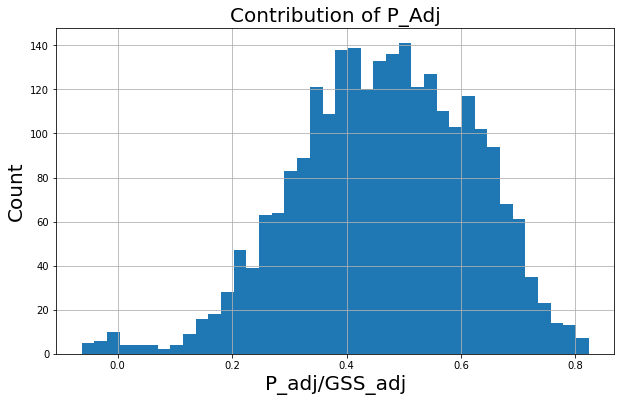

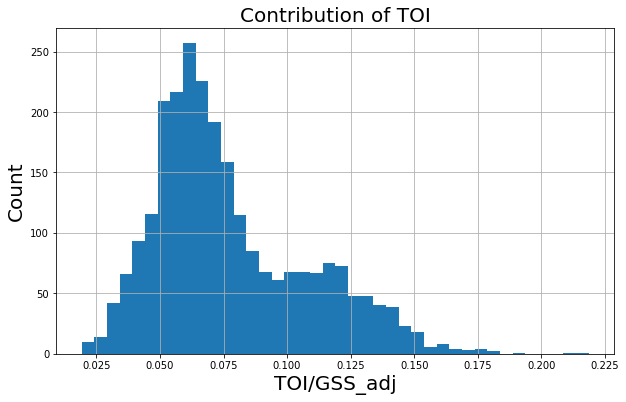

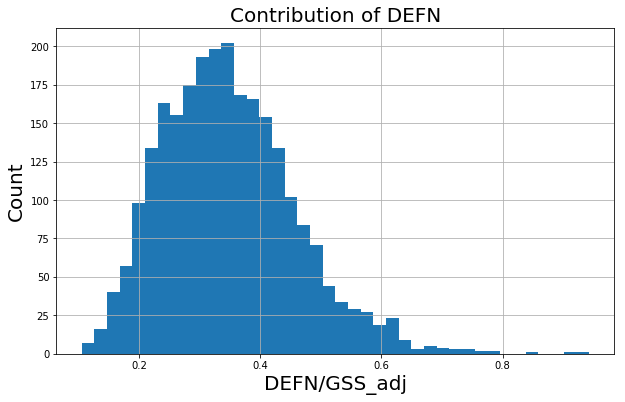

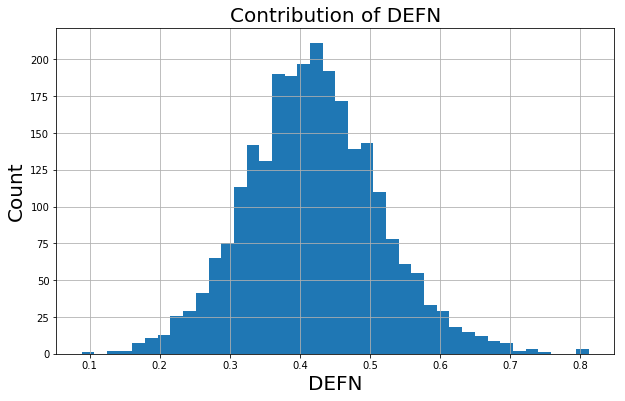

In [11]:
plt.figure(figsize=(10,6))
(ratings['P_adj'] / ratings['GSS_adj']).hist(bins=40)
plt.xlabel('P_adj/GSS_adj',size=20)
plt.ylabel('Count',size=20)
plt.title('Contribution of P_Adj',size=20)
plt.figure(figsize=(10,6))
(ratings['TOI'] / ratings['GSS_adj']).hist(bins=40)
plt.xlabel('TOI/GSS_adj',size=20)
plt.ylabel('Count',size=20)
plt.title('Contribution of TOI',size=20)
plt.figure(figsize=(10,6))
(ratings['DEFN'] / ratings['GSS_adj']).hist(bins=40)
plt.xlabel('DEFN/GSS_adj',size=20)
plt.ylabel('Count',size=20)
plt.title('Contribution of DEFN',size=20)
plt.figure(figsize=(10,6))
(ratings['DEFN']).hist(bins=40)
plt.xlabel('DEFN',size=20)
plt.ylabel('Count',size=20)
plt.title('Contribution of DEFN',size=20)

In [12]:
print((ratings['DEFN'] / ratings['GSS_adj']).mean())
print((ratings['P_adj'] / ratings['GSS_adj']).mean())
print((ratings['TOI'] / ratings['GSS_adj']).mean())

0.3484299771587829
0.4652750741676482
0.07755669779043867


In [13]:
ratings.describe()

,Year,Gms,P_adj,BLK,HIT,GWY,PEN,FO,TOI,DEFN,GSS_adj,Rating
count,2527.000000,2527.00000,2527.000000,2527.000000,2527.000000,2527.000000,2527.000000,2527.000000,2527.000000,2527.000000,2527.000000,2527.000000
mean,2017.009497,56.49070,0.661339,0.050299,0.082487,-0.006054,-0.000670,0.000054,0.101883,0.419289,1.308628,0.777843
std,0.822721,23.32696,0.401711,0.036319,0.049889,0.017415,0.004148,0.013967,0.051919,0.095467,0.453173,0.071062
min,2016.000000,11.00000,-0.034909,0.000000,0.000000,-0.080800,-0.026568,-0.068760,0.011321,0.088585,0.344826,0.585362
25%,2016.000000,37.00000,0.359746,0.024331,0.043733,-0.016400,-0.002583,-0.001800,0.061108,0.357045,0.989558,0.729001
50%,2017.000000,64.00000,0.564726,0.036444,0.073006,-0.003859,-0.000687,0.000000,0.094004,0.416617,1.229749,0.773775
75%,2018.000000,78.00000,0.904321,0.070614,0.112457,0.005704,0.001458,0.000000,0.133079,0.479124,1.583306,0.829672
max,2018.000000,84.00000,2.254807,0.223812,0.341120,0.064725,0.020761,0.152280,0.326727,0.812846,2.981080,0.951712


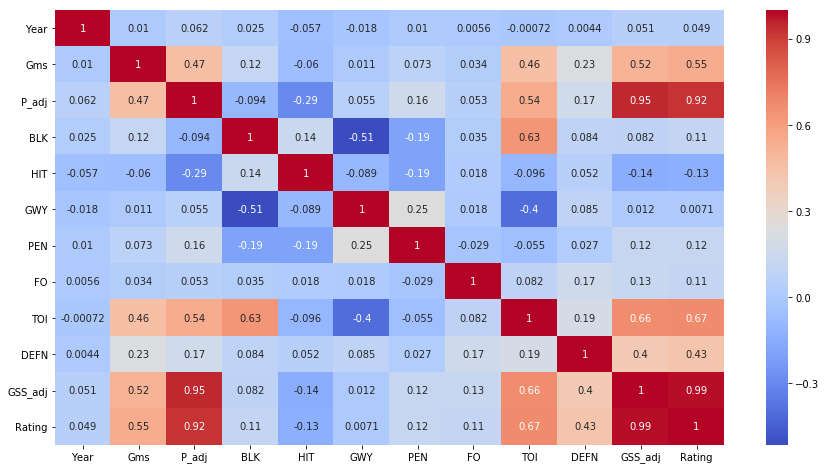

In [14]:
plt.figure(figsize=(15,8))
sns.heatmap(ratings.corr(),cmap='coolwarm',annot=True)


# Pick a player to view by last name

In [38]:
ratings[ratings['Last_name'] == 'Karlsson']

,Code,First_name,Last_name,Team,Nation,Position,Year,Gms,P_adj,BLK,HIT,GWY,PEN,FO,TOI,DEFN,GSS_adj,Rating
920,karlser01,Erik,Karlsson,OTT,SE,D,2016,82,1.768580,0.140000,0.067200,-0.028000,-0.003240,-0.00036,0.326727,0.461908,2.732815,0.938935
921,karlser01,Erik,Karlsson,OTT,SE,D,2017,77,1.679227,0.171242,0.057081,-0.040042,0.002300,0.00000,0.280900,0.453131,2.603839,0.931108
922,karlser01,Erik,Karlsson,OTT,SE,D,2018,71,1.579298,0.110873,0.053589,-0.028642,0.001663,0.00000,0.279629,0.433097,2.429507,0.919050
2116,karlsme01,Melker,Karlsson,SJS,SE,C,2016,65,0.521564,0.048443,0.076702,0.010092,0.003179,-0.00036,0.070862,0.425506,1.155989,0.760603
2117,karlsme01,Melker,Karlsson,SJS,SE,C,2017,67,0.583484,0.057767,0.065600,-0.005875,0.001762,-0.00144,0.062300,0.443699,1.207298,0.769820
2118,karlsme01,Melker,Karlsson,SJS,SE,C,2018,71,0.478421,0.063752,0.074839,0.001848,-0.000832,0.00216,0.069169,0.396697,1.086055,0.747638
2119,karlswi01,William,Karlsson,CBJ,SE,C,2016,81,0.446291,0.038874,0.032395,0.017007,0.001458,-0.02844,0.081567,0.523842,1.112995,0.752687
2120,karlswi01,William,Karlsson,CBJ,SE,C,2017,81,0.545243,0.019437,0.028346,0.010528,0.001458,-0.03240,0.070013,0.409563,1.052188,0.741195
2121,karlswi01,William,Karlsson,VEG,SE,C,2018,82,1.601190,0.036000,0.038400,0.025600,0.002160,-0.01188,0.135866,0.575004,2.402340,0.917006


# Change by=['***'] to choice for ranking

In [16]:
ratings_avg = ratings.groupby(['Code','First_name','Last_name','Team','Nation','Position'], as_index=False).mean()
ratings_avg.sort_values(by=['DEFN'],ascending=False)

,Code,First_name,Last_name,Team,Nation,Position,Year,Gms,P_adj,BLK,HIT,GWY,PEN,FO,TOI,DEFN,GSS_adj,Rating
122,boylebr01,Brian,Boyle,TOR,US,C,2017.0,21.000000,0.251583,0.031238,0.099962,0.009371,-0.004217,0.00180,0.050086,0.697336,1.137160,0.757158
733,krugema01,Marcus,Kruger,CHI,SE,C,2016.5,55.500000,0.312058,0.053851,0.034526,0.011360,-0.003276,-0.00378,0.074687,0.689795,1.169221,0.761819
522,hagelca01,Carl,Hagelin,ANA,SE,LW,2016.0,43.000000,0.521787,0.028986,0.061023,-0.003051,-0.004119,-0.00036,0.090000,0.682969,1.377235,0.798546
1073,plekato01,Tomas,Plekanec,TOR,CS,C,2018.0,17.000000,0.212716,0.015435,0.088753,-0.003859,-0.019101,0.00936,0.048664,0.682882,1.034850,0.737855
1403,tkachma01,Matthew,Tkachuk,CGY,US,LW,2017.5,72.000000,1.192739,0.017212,0.066641,0.004646,0.004250,-0.00180,0.100296,0.682338,2.066322,0.887312
1143,redmoza01,Zach,Redmond,MTL,US,D,2017.0,16.000000,0.612277,0.053300,0.102500,-0.004100,0.014273,0.00000,0.059438,0.681501,1.519189,0.820419
70,bergepa01,Patrice,Bergeron,BOS,CA,C,2017.0,74.333333,1.462288,0.042666,0.052394,0.025087,-0.002183,0.10152,0.149568,0.666970,2.498309,0.923898
325,dumonga01,Gabriel,Dumont,TBL,CA,C,2017.0,39.000000,0.193630,0.031959,0.139610,0.001682,0.003785,0.00864,0.035344,0.660030,1.074680,0.745486
239,coutuse01,Sean,Couturier,PHI,CA,C,2017.0,70.333333,1.187816,0.033742,0.044077,0.006546,0.001527,0.01608,0.150284,0.654788,2.094860,0.886929
1314,staaljo01,Jordan,Staal,CAR,CA,C,2017.0,78.666667,1.052644,0.025579,0.134626,0.008999,0.001032,0.07248,0.138106,0.642538,2.076003,0.888470


# Change ['Position']=='?' to choice (C,LW,RW,D)

In [17]:
ratings_D = ratings_avg[ratings_avg['Position']=='D']
ratings_D.sort_values(by=['DEFN'],ascending=False)

,Code,First_name,Last_name,Team,Nation,Position,Year,Gms,P_adj,BLK,HIT,GWY,PEN,FO,TOI,DEFN,GSS_adj,Rating
1143,redmoza01,Zach,Redmond,MTL,US,D,2017.0,16.000000,0.612277,0.053300,0.102500,-0.004100,0.014273,0.00000,0.059438,0.681501,1.519189,0.820419
803,lindhha01,Hampus,Lindholm,ANA,SE,D,2017.0,71.666667,0.742388,0.093317,0.080528,-0.040115,-0.003539,0.00024,0.197801,0.629073,1.699692,0.845340
1266,siemedu01,Duncan,Siemens,COL,CA,D,2018.0,16.000000,0.224014,0.086100,0.090200,-0.012300,-0.005535,0.00000,0.059438,0.619575,1.061492,0.742976
822,mansojo01,Josh,Manson,ANA,US,D,2017.0,77.666667,0.608544,0.068761,0.158394,-0.022510,-0.002969,-0.00012,0.144988,0.604806,1.559894,0.824771
806,lovejbe01,Ben,Lovejoy,PIT,US,D,2016.0,66.000000,0.344519,0.103370,0.153067,0.001988,-0.004920,0.00000,0.137196,0.580406,1.315625,0.788453
737,kukande01,Dean,Kukan,CBJ,CH,D,2018.0,11.000000,0.700973,0.059636,0.011927,-0.017891,0.002684,0.00000,0.059731,0.578786,1.395847,0.801524
884,mcnabbr01,Brayden,McNabb,LAK,CA,D,2016.5,65.000000,0.310066,0.074616,0.157050,-0.029709,-0.004961,0.00000,0.113616,0.578648,1.199326,0.767691
284,demerja01,Jason,Demers,DAL,CA,D,2016.0,62.000000,0.721336,0.077239,0.090994,-0.013755,-0.006190,0.00000,0.168428,0.574864,1.612916,0.833816
1276,slavija01,Jaccob,Slavin,CAR,US,D,2017.0,75.666667,0.743362,0.125304,0.036097,0.027666,0.001141,0.00000,0.195266,0.570731,1.699567,0.844175
1091,poulide01,Derrick,Pouliot,PIT,CA,D,2016.5,16.500000,0.298109,0.050691,0.065600,-0.004473,0.008368,0.00000,0.088859,0.566314,1.073468,0.731389


# 3-year Weighted average

In [18]:
codes = ratings['Code'].unique()
ratings_avg = []
lastname=[]
firstname=[]
team=[]
nation= []
position=[]
for i in range(0,len(codes)):
    
    temp = ratings[ratings['Code'] == codes[i]].reset_index(drop=True)
    temp = temp.drop_duplicates(subset=['Year'], keep='first').reset_index(drop=True)
    firstname.append(temp['First_name'][0])
    lastname.append(temp['Last_name'][0])
    team.append(temp["Team"].iloc[-1])
    nation.append(temp['Nation'][0])
    position.append(temp['Position'][0])
   
    
    if len(temp) == 3:
        
        ratings_avg.append(float(0.5*temp['Rating'][2]) + float(0.3*temp['Rating'][1]) + float(0.2*temp['Rating'][0]))
        
    elif len(temp) == 2:
        
        ratings_avg.append(float(0.6*temp['Rating'][1]) + float(0.4*temp['Rating'][0]))
                           
    elif len(temp) == 1:
                           
        ratings_avg.append(float(temp['Rating']))
                           

e = {'Code': codes, 'First_name': firstname, 'Last_name': lastname, 'Team': team, 'Nation': nation, 'Position': position, 'Rating': ratings_avg}

ratings_wavg = pd.DataFrame(data=e)
       
        
        
    

In [29]:
ratings_wavg.sort_values(by=['Rating'],ascending=False).reset_index(drop=True)

,Code,First_name,Last_name,Team,Nation,Position,Rating
0,mcdavco01,Connor,McDavid,EDM,CA,C,0.943905
1,marchbr03,Brad,Marchand,BOS,CA,LW,0.934602
2,crosbsi01,Sidney,Crosby,PIT,CA,C,0.933920
3,getzlry01,Ryan,Getzlaf,ANA,CA,C,0.927994
4,karlser01,Erik,Karlsson,OTT,SE,D,0.926644
5,kucheni01,Nikita,Kucherov,TBL,RU,RW,0.924502
6,wheelbl01,Blake,Wheeler,WPG,US,RW,0.923859
7,malkiev01,Evgeni,Malkin,PIT,RU,C,0.923636
8,bergepa01,Patrice,Bergeron,BOS,CA,C,0.923509
9,kopitan01,Anze,Kopitar,LAK,SI,C,0.922395


In [20]:
ratings_wavg.to_csv('2018_ratings.csv')

# Change nationality: ['Nation'] == 'CA', to US, CA, RU, SE, CZ, CH, DE, FI for main countries. Also change : sort_values(by=['?','?'], to choice of paramter

In [25]:

ratings_wavg[ratings_wavg['Nation'] == 'CA'].sort_values(by=['Team','Last_name'],ascending=True).reset_index(drop=True)

,Code,First_name,Last_name,Team,Nation,Position,Rating
0,beaucfr01,Francois,Beauchemin,ANA,CA,D,0.778874
1,biekske01,Kevin,Bieksa,ANA,CA,D,0.734635
2,coglian01,Andrew,Cogliano,ANA,CA,LW,0.815792
3,desprsi01,Simon,Despres,ANA,CA,D,0.760113
4,fowleca01,Cam,Fowler,ANA,CA,D,0.842495
5,garbury01,Ryan,Garbutt,ANA,CA,C,0.691921
6,getzlry01,Ryan,Getzlaf,ANA,CA,C,0.927994
7,grantde01,Derek,Grant,ANA,CA,C,0.711970
8,horcosh01,Shawn,Horcoff,ANA,CA,C,0.762357
9,kellych01,Chris,Kelly,ANA,CA,C,0.653856


# Select by Team: ratings_wavg['Team'] == '?'

In [34]:

ratings_wavg[ratings_wavg['Team'] == 'TBL'].sort_values(by=['Rating'],ascending=False).reset_index(drop=True)

,Code,First_name,Last_name,Team,Nation,Position,Rating
0,kucheni01,Nikita,Kucherov,TBL,RU,RW,0.924502
1,stamkst01,Steven,Stamkos,TBL,CA,C,0.918210
2,hedmavi01,Victor,Hedman,TBL,SE,D,0.910092
3,pointbr01,Brayden,Point,TBL,CA,C,0.866416
4,palaton01,Ondrej,Palat,TBL,CS,LW,0.862159
5,gourdya01,Yanni,Gourde,TBL,CA,C,0.857777
6,cirelan01,Anthony,Cirelli,TBL,CA,C,0.844257
7,johnsty01,Tyler,Johnson,TBL,US,C,0.841869
8,killoal01,Alex,Killorn,TBL,CA,C,0.826858
9,sergami01,Mikhail,Sergachev,TBL,RU,D,0.804114


# Comparison to EA sports

In [109]:
EAS = pd.read_csv('D:/Python/Insight/NHL_player_rating/2018-2019_ratings_EAS.csv')
EAS['Rating'] = EAS['Rating']*100

In [110]:
EAS.head()

,Unnamed: 0,Code,First_name,Last_name,Team,Nation,Position,Rating,EA Sports
0,0,beaucfr01,Francois,Beauchemin,ANA,CA,D,77.887372,NaN
1,1,biekske01,Kevin,Bieksa,ANA,CA,D,73.463496,NaN
2,2,bollja01,Jared,Boll,ANA,US,RW,61.289810,NaN
3,3,coglian01,Andrew,Cogliano,ANA,CA,LW,81.579154,81.0
4,4,getzlry01,Ryan,Getzlaf,ANA,CA,C,92.799364,88.0


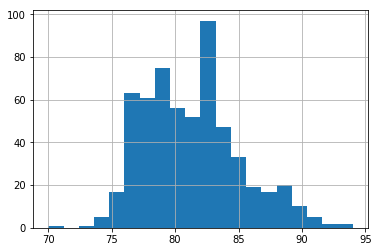

In [111]:
EAS['EA Sports'].hist(bins=20)


In [112]:
EAS = EAS.dropna()
EAS = EAS[EAS['Rating']>=73]

In [113]:
EAS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 527 entries, 3 to 975
Data columns (total 9 columns):
Unnamed: 0    527 non-null int64
Code          527 non-null object
First_name    527 non-null object
Last_name     527 non-null object
Team          527 non-null object
Nation        527 non-null object
Position      527 non-null object
Rating        527 non-null float64
EA Sports     527 non-null float64
dtypes: float64(2), int64(1), object(6)
memory usage: 41.2+ KB


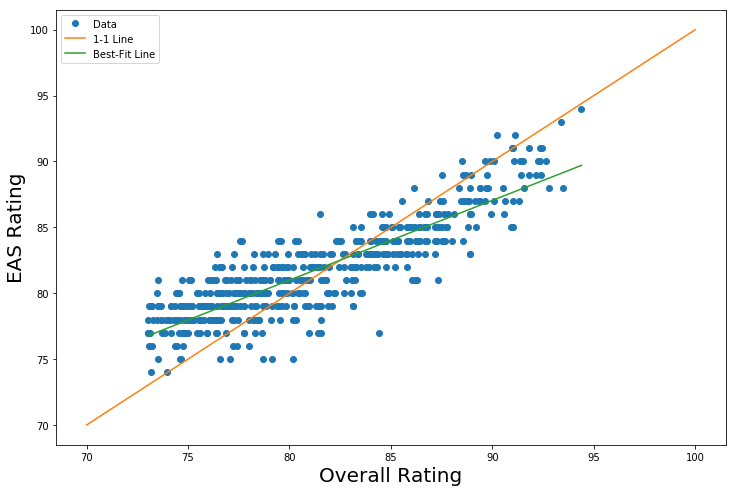

In [114]:
f, ax=plt.subplots(1,figsize=[12,8])

plt.plot(EAS['Rating'], EAS['EA Sports'],'o',[70,100],[70,100])
plt.plot(np.unique(EAS['Rating']), np.poly1d(np.polyfit(EAS['Rating'], EAS['EA Sports'], 1))(np.unique(EAS['Rating'])))
ax.legend(['Data', '1-1 Line','Best-Fit Line'])
plt.xlabel('Overall Rating',size=20)
plt.ylabel('EAS Rating',size=20)
pylab.savefig('dist.png')

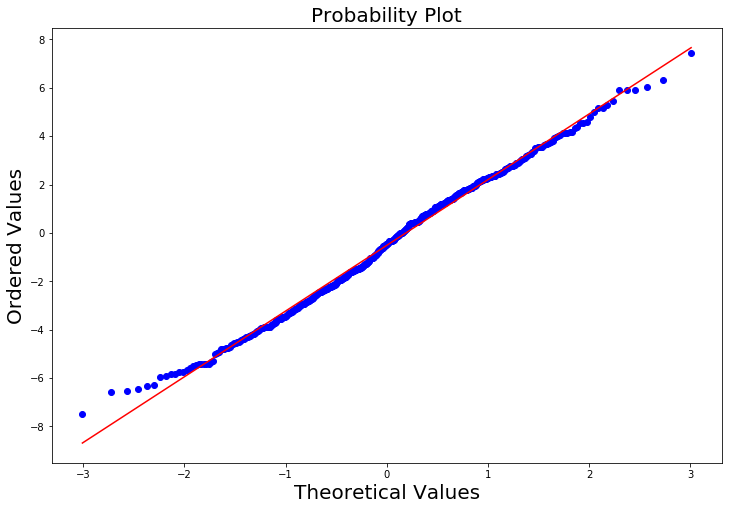

In [115]:
import numpy as np 
import pylab 
import scipy.stats as stats
f=plt.figure(3,figsize=[12,8])
measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(EAS['Rating'] - EAS['EA Sports'], dist="norm", plot=pylab)

plt.xlabel('Theoretical Values',size=20)
plt.ylabel('Ordered Values',size=20)
plt.title('Probability Plot',size=20)

pylab.show()

In [116]:
import scipy
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(EAS['Rating'], EAS['EA Sports'])
print('Slope: ' + str(slope))
print('Intercept: ' + str(intercept))
print('R2 Value: ' + str(r_value**2))
print('P-value for slope: ' + str(p_value))
print('RMSE: ' + str(((sum((EAS['Rating'] - EAS['EA Sports'])**2)) / len(EAS['EA Sports']))**0.5))

print('R_value: ' + str(np.corrcoef(EAS['Rating'], EAS['EA Sports'])))

Slope: 0.6052087402671583
Intercept: 32.57714651819538
R2 Value: 0.7551209719820167
P-value for slope: 1.592837986543966e-162
RMSE: 2.759370003157291
R_value: [[1.         0.86897697]
 [0.86897697 1.        ]]


# Significance test

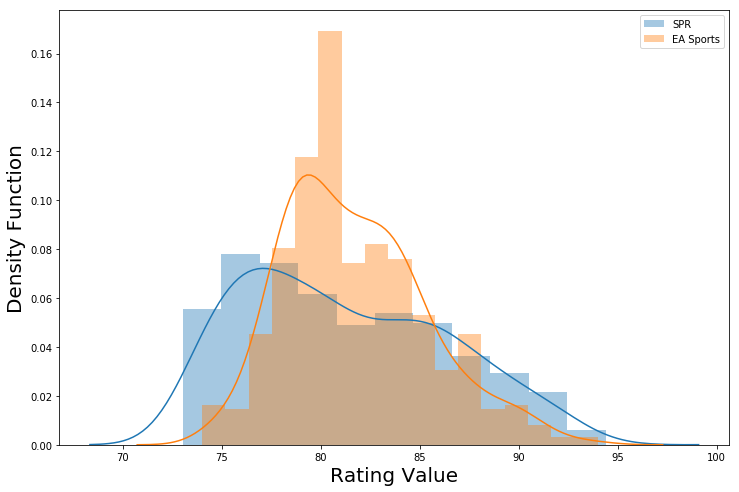

In [47]:
fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(EAS['Rating'])
sns.distplot(EAS['EA Sports'])

ax.legend(['SPR', 'EA Sports'])
plt.xlabel('Rating Value',size=20)
plt.ylabel('Density Function',size=20)
pylab.savefig('hist.png')

In [48]:
EAS_stats = EAS.describe()
EAS_stats.drop(['Unnamed: 0'],axis=1)

,Rating,EA Sports
count,527.000000,527.000000
mean,81.217273,81.730550
std,5.178374,3.606537
min,73.036241,74.000000
25%,76.795525,79.000000
50%,80.441034,81.000000
75%,85.267303,84.000000
max,94.390541,94.000000


In [49]:
# Wilcoxon signed-rank test. A paired test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import wilcoxon

# compare samples
stat, p = wilcoxon(EAS['EA Sports'],EAS['Rating'])
print('Statistics=%.3f, p=%.6f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=55213.000, p=0.000041
Different distribution (reject H0)


In [124]:
# create function to sample with replacement
def get_sample(df, n):
    sample = []
    while len(sample) != n:
        x = np.random.choice(df)
        sample.append(x)
    return sample
# create function to calculate mean of the sample
def get_sample_mean(sample):
    return sum(sample)/len(sample)
# combine functions to create a sample distribution
# create a distribution size of 1000 and sample size of 500
def create_sample_distribution(df, dist_size=500, n=527):
    sample_dist = [] 
    while len(sample_dist) != dist_size:
        sample = get_sample(df, n)
        sample_mean = get_sample_mean(sample)
        sample_dist.append(sample_mean)
        
    return sample_dist
# create sample distributions of sample mean for control and target
ctrl_sample = create_sample_distribution(EAS['EA Sports'])
exp_sample = create_sample_distribution(EAS['Rating'])

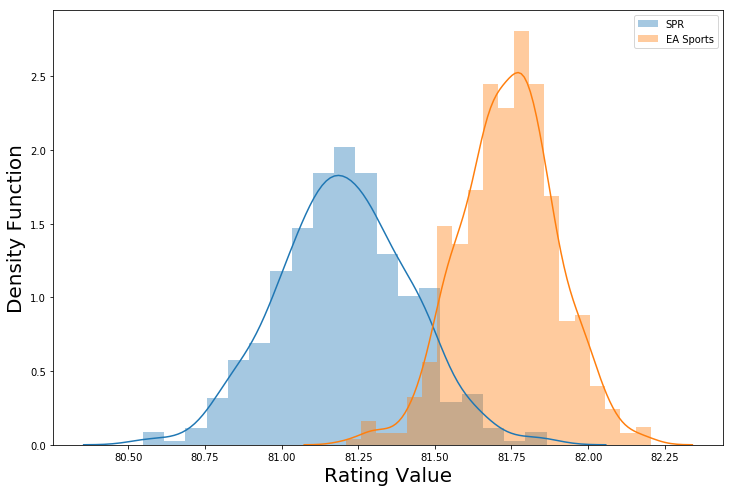

In [125]:
fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(exp_sample)
sns.distplot(ctrl_sample)

ax.legend(['SPR','EA Sports'])
plt.xlabel('Rating Value',size=20)
plt.ylabel('Density Function',size=20)
pylab.savefig('hist1.png')

In [126]:
np.var(ctrl_sample) == np.var(exp_sample)

False

In [127]:
scipy.stats.ttest_ind(exp_sample, ctrl_sample, equal_var= False)

Ttest_indResult(statistic=-45.18351942477586, pvalue=5.005984369967293e-235)

In [128]:
# function to calculate Cohen's d for independent samples
def cohend(d1, d2):
    # calculate the size of samples
    n1, n2 = len(d1), len(d2)
    # calculate the variance of the samples
    s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
    # calculate the pooled standard deviation
    s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    # calculate the means of the samples
    u1, u2 = np.mean(d1), np.mean(d2)
    # calculate the effect size
    return (u1 - u2) / s

print("Cohen's d:", cohend(np.array(ctrl_sample),np.array(exp_sample)) )

Cohen's d: 2.8576566816950546


In [123]:
scipy.stats.ks_2samp(EAS['EA Sports'],EAS['Rating'])

Ks_2sampResult(statistic=0.24667931688804556, pvalue=1.4307051299766067e-14)

# Sigmoid Function

In [495]:
x = np.arange(-5, 5, 0.1)
y =[]
for i in range(0,len(x)):
    
    y.append( 1 / (1 + math.exp(-x[i])) *100 )
    
    

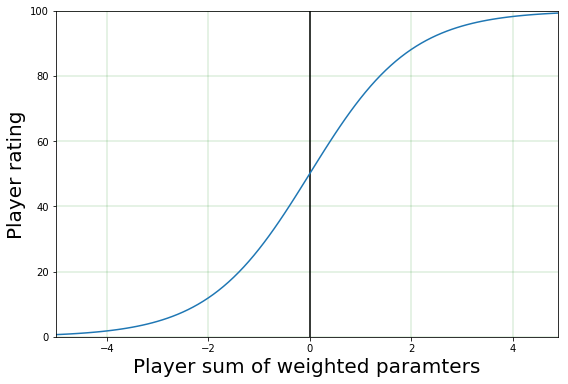

In [496]:
fig, ax = plt.subplots(figsize=(9,6))

plt.plot(x,y)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)
plt.vlines(0, ymin=0, ymax=100)
plt.grid(color='g', linestyle='-', linewidth=0.2)
plt.xlabel('Player sum of weighted paramters',size=20)
plt.ylabel('Player rating',size=20)
pylab.savefig('Sigmoid.png')

# Offensive Zone Starts for entire league 2016-2018

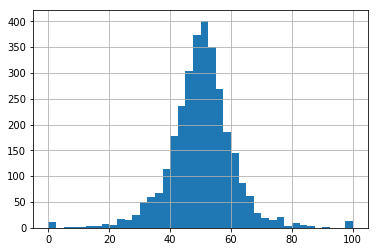

In [497]:
df4['OZS'].hist(bins=40)

# LA Kings mean OZS

In [498]:
df4[df4['Team'] == 'LAK'].OZS.mean()

54.44395604395604